<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/UnggyuLee/bee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


             file     date   time           location  zip code subspecies  \
0     041_066.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
1     041_072.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
2     041_073.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
3     041_067.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
4     041_059.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
...           ...      ...    ...                ...       ...        ...   
5167  027_011.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5168  027_007.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5169  027_013.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5170  027_012.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5171  027_014.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   

                 health  pollen_carrying   caste  
0     hive being robbed 

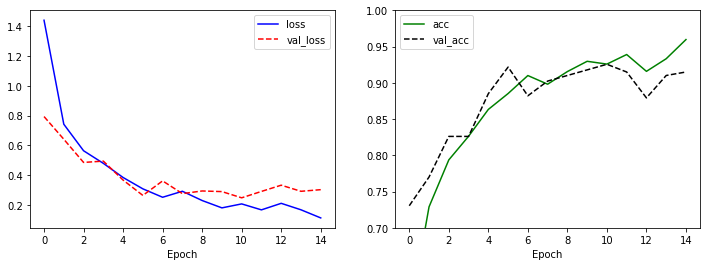

health model
[0.20634829998016357, 0.9217391014099121]


In [ ]:
from ctypes import sizeof
from PIL import Image
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os

#목표
#시각화를 통해 꿀벌 데이터를 확인한다.
#이미지처리기술을 활용하여 꿀벌의 종류 및 건강상태를 분류한다.

rootDir='/content/drive/MyDrive/'
csvDir = rootDir+'bee_data.csv'
imgDir= rootDir+'bee_imgs/bee_imgs/'
npyDir=rootDir+"train.npy"
targetImgDir= rootDir+"testimage/"

width = 70
height= 70

imgs = []
label_health=[]


csvData = pd.read_csv(csvDir)
print(csvData)

#데이터 로드 및 전처리
if(os.path.isfile(npyDir)):
  imgs=np.load(npyDir)
else:
  for file in csvData['file']:
    image = np.array(Image.open(imgDir+file).resize((width,height)).convert('RGB'))
    imgs.append(image)
  imgs=np.array(imgs)
  imgs=imgs/255
  imgs= imgs.reshape(-1,width,height,3)
  np.save(npyDir,imgs)

for label in csvData['health']:
  label_health.append(label)

label_health=np.array(label_health)

#string to int
class_le = LabelEncoder()
label_health = class_le.fit_transform(label_health)


#테스트 데이터 나누기
train_X, test_X, train_Y, test_Y = train_test_split(imgs,label_health,test_size=0.2,random_state=1111)

#모델 빌드
healthmodel = Sequential([
    # 특징 추출기 (Feature Extractor)
    Conv2D(input_shape=(width, height, 3), kernel_size=(3, 3), filters=32),
    MaxPool2D(strides=(2, 2)),
    Conv2D(kernel_size=(3, 3), filters=64),
    MaxPool2D(strides=(2, 2)),
    Conv2D(kernel_size=(3, 3), filters=128),
    # 다차원 이미지 => 1차원
    Flatten(),
    # 분류기 (Classifier)
    Dense(units=128, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=10, activation='softmax')
])

healthmodel.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = healthmodel.fit(train_X, train_Y, epochs=15,batch_size=100, validation_split=0.25)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='acc')
plt.plot(history.history['val_accuracy'], 'k--', label='val_acc')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# 모델 평가
print("health model")
print(healthmodel.evaluate(test_X, test_Y, verbose=0))

In [ ]:
print(label_health)

[4 4 4 ... 3 3 3]


['Varroa, Small Hive Beetles' 'ant problems' 'few varrao, hive beetles'
 'healthy' 'hive being robbed' 'missing queen']
0  :  Varroa, Small Hive Beetles
1  :  ant problems
2  :  few varrao, hive beetles
3  :  healthy
4  :  hive being robbed
5  :  missing queen


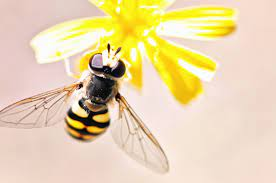

1/1 [==============================] - 0s 39ms/step
healthy


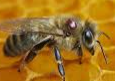

1/1 [==============================] - 0s 15ms/step
Varroa, Small Hive Beetles


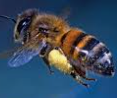

1/1 [==============================] - 0s 17ms/step
healthy


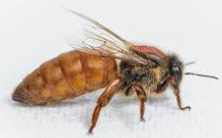

1/1 [==============================] - 0s 15ms/step
healthy


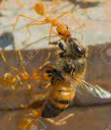

1/1 [==============================] - 0s 27ms/step
ant problems


In [ ]:
from glob import glob
from google.colab.patches import cv2_imshow
import cv2
fileList = glob(targetImgDir+'*.png')

classes = class_le.classes_
print(classes)
i = 0
for temp in classes:
  print(i," : ",temp)
  i=i+1
for dir in fileList:
  img1 = cv2.imread(dir)
  cv2_imshow(img1)
  targetImg = np.array(Image.open(dir).resize((70,70)).convert('RGB'))
  targetImg=np.array(targetImg)
  targetImg=targetImg/255
  targetImg= targetImg.reshape(-1,width,height,3)
  result = healthmodel.predict(targetImg,batch_size=100)
  predicted = result.argmax(axis=-1)
  print(classes[predicted[0]])
  